<a href="https://colab.research.google.com/github/GattupalliMonica/projects/blob/main/Finetune_VGG16_for_Pepper_Leaf_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## [Pepper Disease Prediction using Convolutional Neural Network](https://)
This notebook explains
1. How to load Leaf disease data from drive
2. Load Pretrained deep CNN architecture, VGG16
3. Fine tune VGG16 on Leaf disease data
4. Evaluate model performance

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import cv2
import numpy as np

data_path = '/content/drive/MyDrive/Pepper_Leaf_Disease'
classes = os.listdir(data_path)
Images = []
labels = []
for c in classes:
    for im in os.listdir(data_path+c):
        im_path = data_path+c+"/"+im
        print(im_path)
        img = cv2.imread(im_path)
        img = cv2.resize(img,(224,224))
        Images.append(img)
        label = classes.index(c)
        labels.append(label)
        print(im,'-->',img.shape,'--->',label)
        
X = np.asarray(Images)
y = np.asarray(labels)

FileNotFoundError: ignored

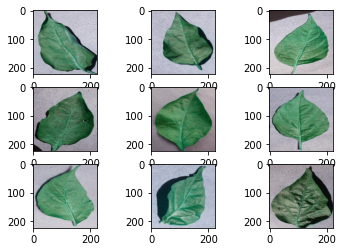

In [ ]:
from matplotlib import pyplot
# plot first few images from data
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # plot raw pixel data
    pyplot.imshow(X[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

In [ ]:
#split your data to train and test partitions
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
#Load VGG model and import all the required layers to extend the network
from keras.models import Sequential
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.layers import Dense, Flatten

Using TensorFlow backend.


In [ ]:
#Create the base pre-trained model with the convolution base after removing the fully connected nodes at the end of the network
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
conv_base= VGG16()
conv_base.summary()

58892288/58889256 [==============================] - 5s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
______________________________________________________________

In [ ]:
# Crate your model by having initial layers as convolution base of VGG16
#Replace the fully connected nodes with freshly initialized ones.​
model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               6422784   
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 21,137,729
Trainable params: 21,137,729
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Freeze the conv layers from learning
for layer in conv_base.layers:
   layer.trainable = False

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               6422784   
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 21,137,729
Trainable params: 6,423,041
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=8,epochs=10,validation_split=0.1)

Train on 360 samples, validate on 40 samples
Epoch 1/10
360/360 [==============================] - 14s 38ms/step - loss: 6.1877 - accuracy: 0.8444 - val_loss: 2.9109 - val_accuracy: 0.9000
Epoch 2/10
360/360 [==============================] - 7s 18ms/step - loss: 0.6136 - accuracy: 0.9667 - val_loss: 3.8013 - val_accuracy: 0.9250
Epoch 3/10
360/360 [==============================] - 7s 18ms/step - loss: 0.2877 - accuracy: 0.9861 - val_loss: 3.8928 - val_accuracy: 0.8500
Epoch 4/10
360/360 [==============================] - 7s 18ms/step - loss: 0.1482 - accuracy: 0.9889 - val_loss: 2.1250 - val_accuracy: 0.9500
Epoch 5/10
360/360 [==============================] - 7s 18ms/step - loss: 0.5889 - accuracy: 0.9833 - val_loss: 9.7168 - val_accuracy: 0.8000
Epoch 6/10
360/360 [==============================] - 7s 18ms/step - loss: 0.0914 - accuracy: 0.9917 - val_loss: 1.5166 - val_accuracy: 0.9000
Epoch 7/10
360/360 [==============================] - 7s 18ms/step - loss: 0.0630 - accuracy: 0.

In [ ]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test)
print("Accuracy: %.2f%%" % (scores[1]*100))

100/100 [==============================] - 5s 50ms/step
Accuracy: 95.00%
